In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

## Logistic Regression

In [3]:
games = pd.read_csv('games-prediction.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good


In [4]:
# Extract Response and Predictors
X = games.drop(['status'], axis = 1) 
y = games['status']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6620534277438043

TPR Train :	 0.9575557390586292
TNR Train :	 0.11420698101653398

FPR Train :	 0.885793018983466
FNR Train :	 0.04244426094137077


<AxesSubplot:>

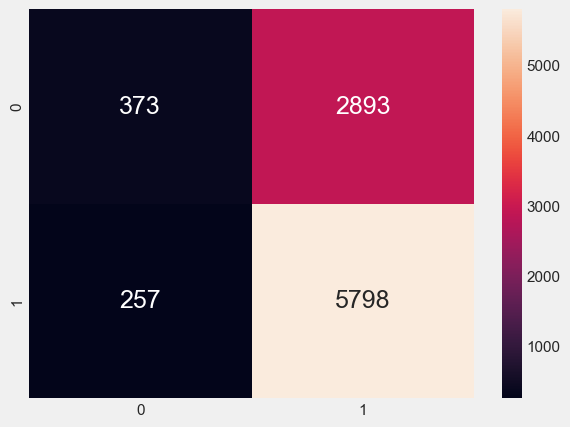

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 

Test Data
Accuracy  :	 0.667953667953668

TPR Test :	 0.9641672196416722
TNR Test :	 0.1262135922330097

FPR Test :	 0.8737864077669902
FNR Test :	 0.035832780358327807


<AxesSubplot:>

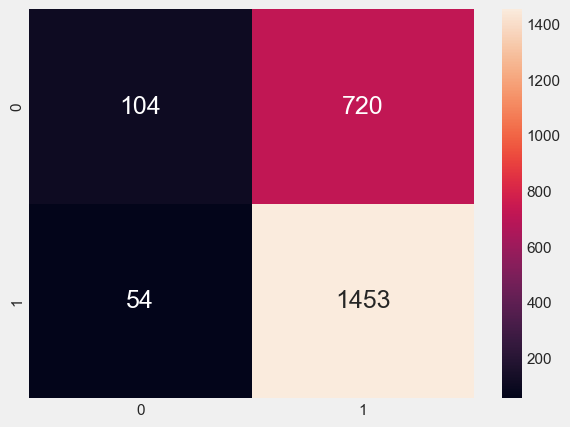

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Logistic Regression - Oversampling

In [8]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good


In [9]:
# Extract Response and Predictors
X = games.drop(['status'], axis = 1) 
y = games['status']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.6003857457751653

TPR Train :	 0.8552958727001492
TNR Train :	 0.2836251287332647

FPR Train :	 0.7163748712667353
FNR Train :	 0.14470412729985083


Test Data
Accuracy  :	 0.5989717223650386

TPR Test :	 0.8580771746239372
TNR Test :	 0.26716917922948075

FPR Test :	 0.7328308207705193
FNR Test :	 0.1419228253760628


<AxesSubplot:>

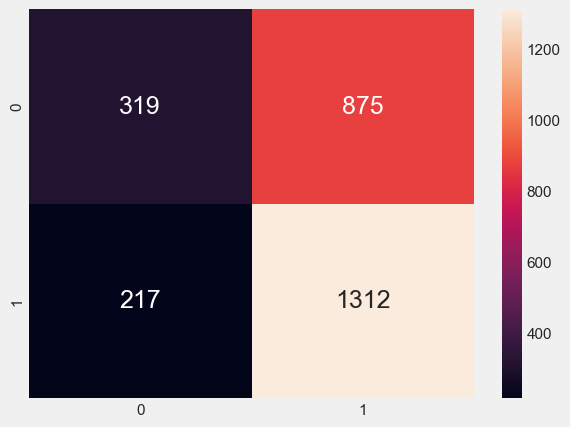

In [11]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Logistic Regression - Balanced Resampled

In [12]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good
8,29.99,29.99,0.000000,0,0,0,0,0,0,0,...,-0.004186,-0.005201,-0.003436,-0.045739,0.002760,-0.008283,-0.005218,-0.011827,False,good
10,19.99,19.99,0.000000,0,1,0,0,1,0,0,...,-0.004112,-0.005106,-0.003352,-0.046456,0.002812,-0.008902,-0.005651,-0.012837,False,good


In [15]:
# Extract Response and Predictors
X = games.drop(['status'], axis = 1) 
y = games['status']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.5714521861310852

TPR Train :	 0.6936043629152207
TNR Train :	 0.44923941798941797

FPR Train :	 0.550760582010582
FNR Train :	 0.30639563708477935


Test Data
Accuracy  :	 0.5695867768595041

TPR Test :	 0.7107875579086698
TNR Test :	 0.428665785997358

FPR Test :	 0.5713342140026421
FNR Test :	 0.28921244209133024


<AxesSubplot:>

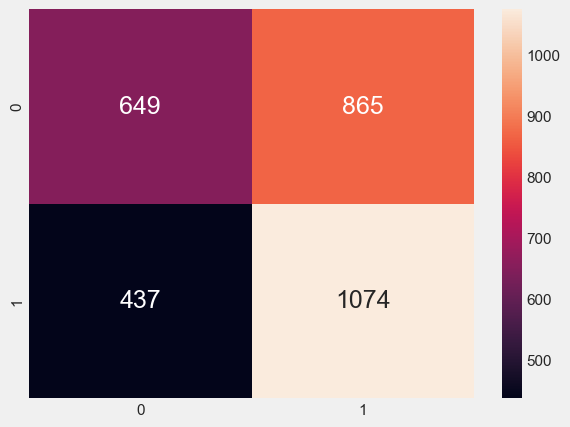

In [17]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})